<a href="https://colab.research.google.com/github/brillync/AI/blob/main/clustering_auto_mpg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [322]:
import pandas as pd

# Load the data
data = pd.read_csv('auto-mpg.csv')

# Display the first few rows
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [327]:
# Convert data type to integer (if necessary)
data['mpg'] = data['mpg'].astype(int)
data['displacement'] = data['displacement'].astype(int)

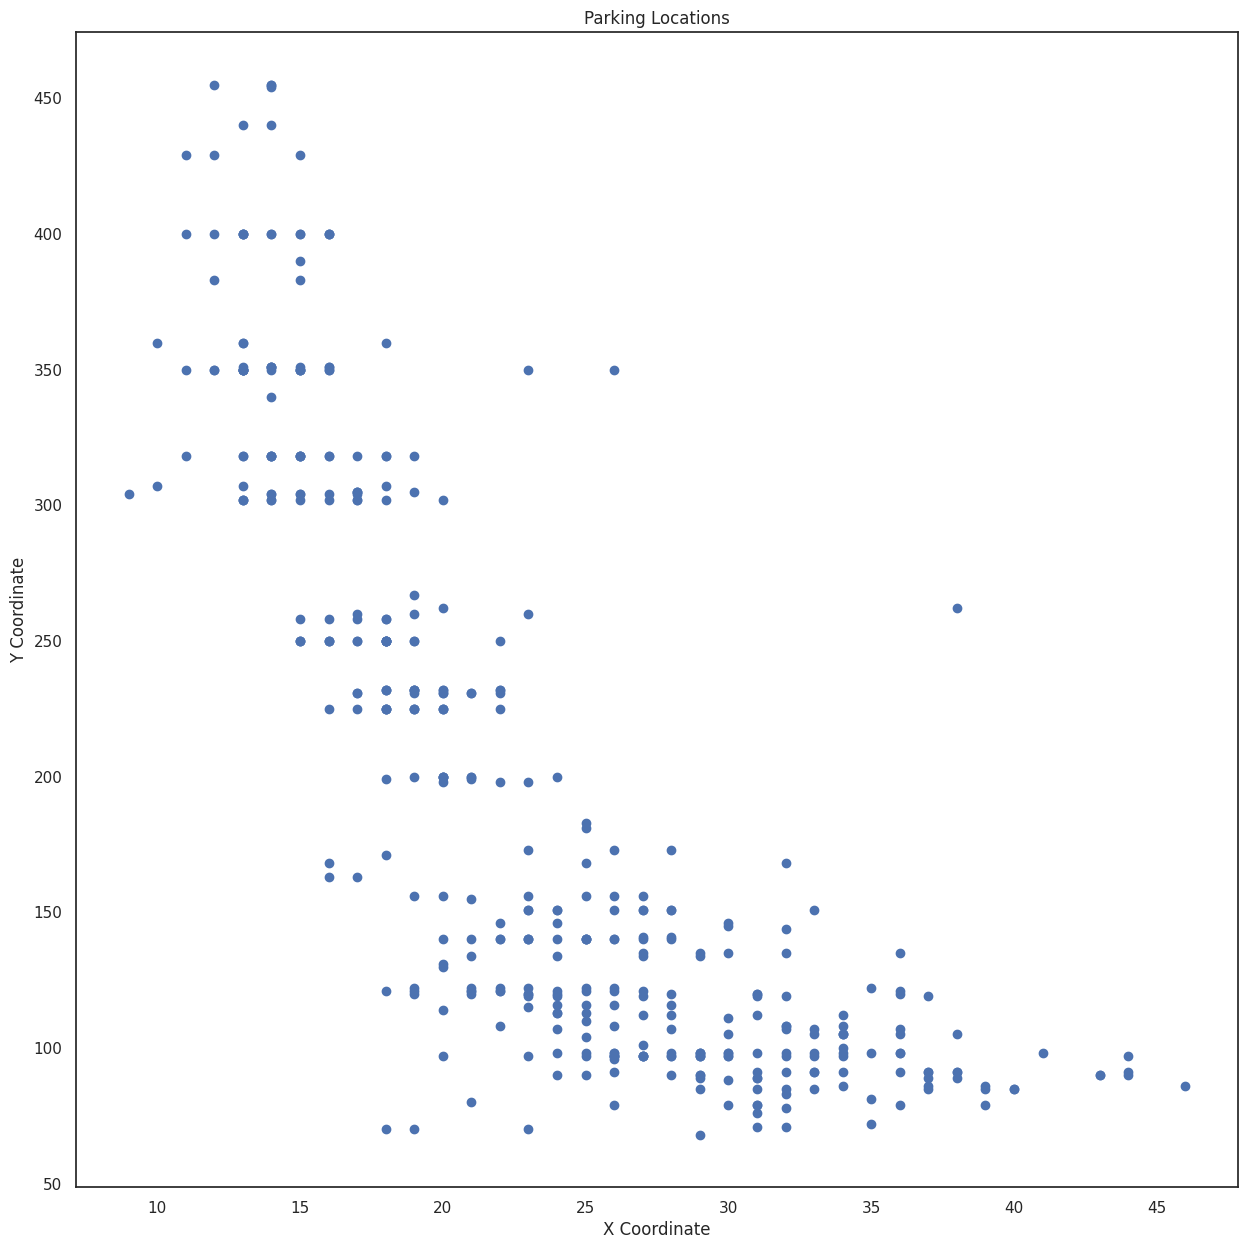

In [330]:
# Visualisasi data
plt.scatter(data['mpg'], data['displacement'])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Parking Locations')
plt.show()

In [331]:
# Menghapus baris dengan nilai yang hilang
data = data.dropna()

In [333]:
from sklearn.cluster import KMeans

# Membagi data menjadi fitur dan target
X = data[['mpg', 'displacement']]

# Membuat model K-Means
kmeans = KMeans(n_clusters=3, random_state=0)

# Melatih model
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [337]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Evaluation
y_numeric = pd.factorize(y)[0]  # Convert string labels to numeric labels
y_pred = kmeans.predict(X)
print("Classification Report:")
print(classification_report(y_numeric, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_numeric, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_numeric, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.03      0.75      0.06         4
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [338]:
# Model Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
# Model Training
model = KMeans(n_clusters=3)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [340]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Evaluation
y_numeric_test = pd.factorize(y_test)[0]  # Convert string labels to numeric labels
y_pred_test = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_numeric_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_numeric_test, y_pred_test))
print("\nAccuracy Score:")
print(accuracy_score(y_numeric_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.02      1.00      0.04         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [341]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.6857009035660027


In [342]:
print("Model K-Means dengan 3 cluster memberikan hasil terbaik dalam pemilihan area parkir kendaraan.")


Model K-Means dengan 3 cluster memberikan hasil terbaik dalam pemilihan area parkir kendaraan.
